In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
len(data.columns)

371

In [4]:
df=data

In [5]:
x=df.drop(labels=['TARGET'],axis=1)
y=df['TARGET']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

<AxesSubplot:>

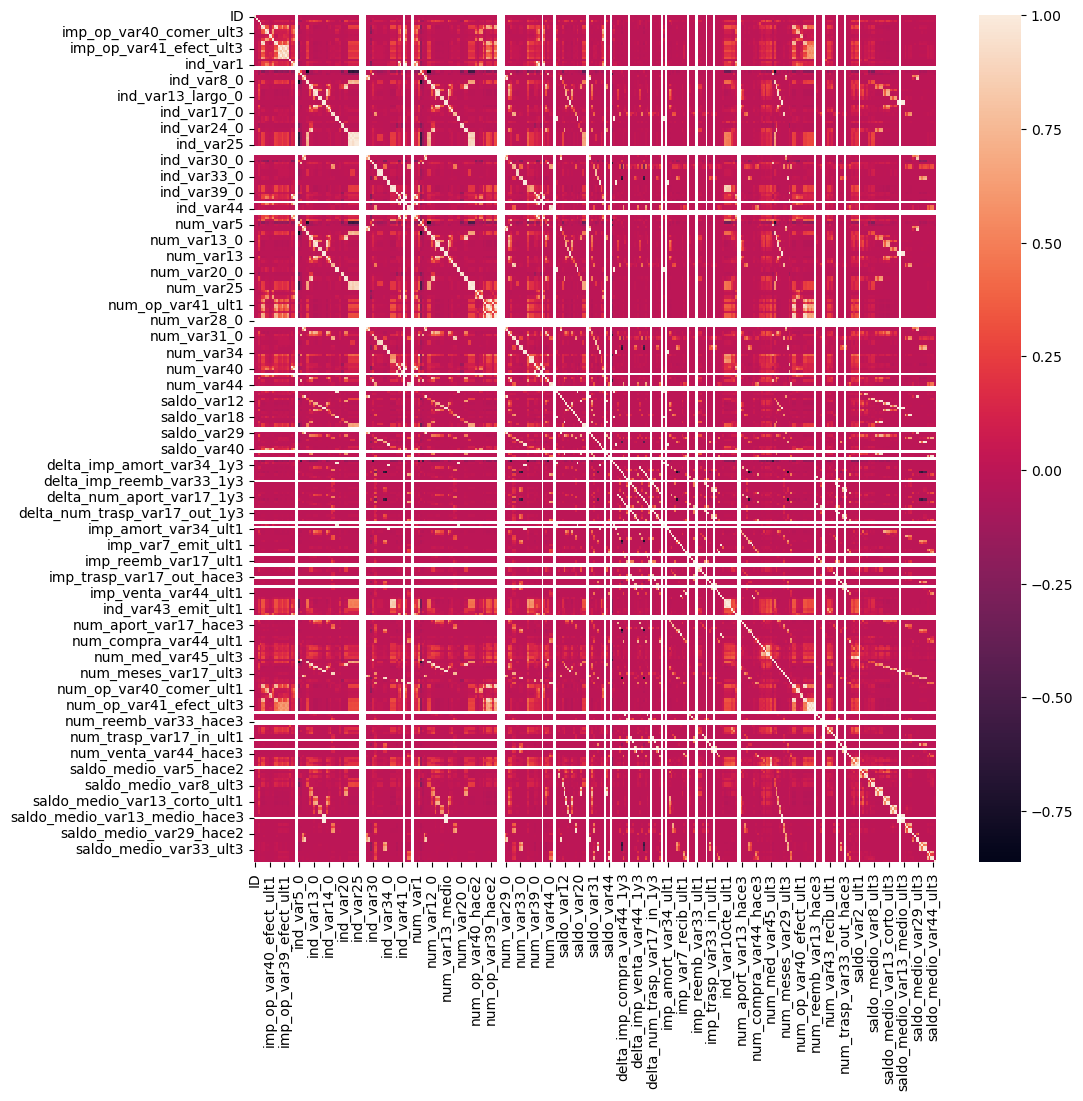

In [8]:
corrmat=x_train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

164

In [11]:
corr_features

{'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_trasp_var17_out_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var13_medio',
 'ind_var18',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var34',
 'ind_var37',
 '

In [12]:
x_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_medio_hace3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
7526,15083,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
51929,103706,2,48,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451931.220000
46677,93351,2,40,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41225.670000
46194,92424,2,83,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
20190,40437,2,79,0.0,535.41,535.41,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153477.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,42533,53,46,0.0,1770.48,2669.46,451.74,808.77,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124242.570000
45891,91801,2,29,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34968.270000
42613,85345,9,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69090.870000
43567,87270,2,30,60.0,72.48,95.64,0.00,0.00,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66354.510000
